## Лабораторная работа №2 по курсу "Методы оптимизации".

Студент: Гольцов И. С.

Группа: РК6-64.

##### Импорт и общие параметры.

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve, minimize
from sympy import symbols, log, lambdify

k = 0.5
params = [1, 1, 1, 1]
x0 = 1
y0 = 1

##### Математическая модель Вольтерра-Лотки.

Для начала рассмотрим модель Вольтерра-Лотки для имитации межвидового взаимодействия.
Известно, что система уравнений описывающих данную модель, имеет следующий вид: <br>
    `dx / dt = (alpha – beta * y) * x` <br>
    `dy / dt = (-gamma + delta * x) * y`, <br>
    где `x` — количество жертв, `y` — количество хищников, `t` — время, `alpha, beta, gamma, delta` — коэффициенты, отражающие взаимодействия между видами; `x0` и `y0` - начальные условия.
<br>
Далее, упрощая данное выражение путем избавления от `dt` и последующего интегрирования, получаем следующее выражение: <br>
    `const = - a * ln(y) + beta * y - gamma * ln(x) + delta * x`. <br>
Заметим, что константа `const` легко может быть получена при подстановке начальных условий (начального количества жертв `x0` и начального количества хищников `y0`). <br>

##### Критерий устойчивости.

В качестве критерия устойчивости биологической системы были выбраны такие значения параметров, при которых количество хищников и жертв на пике роста или падения отличается не более чем на `k=0.5` на всём интервале моделирования, поскольку именно такие случае, где виду грозит вымирание, наиболее интересны для исследования.

##### Поиск экстремума предложенного критерия.

Для решения такой задачи необходимо отыскать координаты стационарной точки, вокруг которой будут происходить колебания, а затем, используя их, а также значение константы `const`, мы сможем найти минимальное и максимальное количество хищников и жертв в пределах одного периода. <br>
Воспользуемся для этого средствами таких библиотек python, как sympy и scipy. <br>
Затем, рассчитав оценку соответствия выбранному критерию устойчивости,
найдем такие параметры, при которых эта оценка будет равна нулю (также используя средства библиотек python, а именно метод minimize из модуля scipy), то есть такие параметры, при которых условие, наложенное на критерий, выполняется.

In [58]:
def find_ext(params):
    alpha, beta, gamma, delta = params
    
    x_stat = gamma / delta
    y_stat = alpha / beta
    
    x = symbols('x')
    y = symbols('y')
    
    const = - alpha * np.log(y0) + beta * y0 - gamma * np.log(x0) + delta * x0  
    f = - alpha * log(y) + beta * y - gamma * log(x) + delta * x - const
    
    lambda_y = lambdify(y, f.subs(x, x_stat), "math")
    y1 = fsolve(lambda_y, 0.001)
    y2 = fsolve(lambda_y, 2 * y_stat)
    
    lambda_x = lambdify(x, f.subs(y, y_stat), "math")
    x1 = fsolve(lambda_x, 0.001)
    x2 = fsolve(lambda_x, 2 * x_stat)
    
    max_func = max(abs(x_stat - y1), abs(x_stat - y2), abs(y_stat - x1), abs(y_stat - x2))
    
    return(abs(max_func - k))

In [59]:
solution = minimize(find_ext, params)
print("alpha = {}".format(solution.x[0]))
print("beta = {}".format(solution.x[1]))
print("gamma = {}".format(solution.x[2]))
print("delta = {}".format(solution.x[3]))

alpha = 1.6552198594510252
beta = 1.2823086842614242
gamma = 1.6552198594510252
delta = 1.2823086842614242


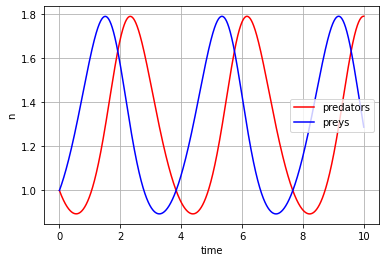

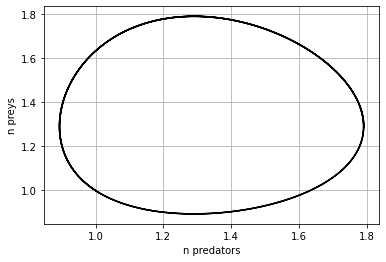

In [60]:
class Biome(object):
    def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.0001):
        self._dt = dt
        self._n_iters = int(tmax / dt)
        # Intial state
        self.pred_init = pred_init
        self.prey_init = prey_init
        # Data arrays
        self.time = None
        self.prey = None
        self.pred = None

    def run(self, alpha, beta, gamma, delta):
        """
        Simulation settings:
            alpha - prey growth
            beta - prey mortality
            delta - predator growrh
            gamma - predator mortality
        """
        self.time = np.zeros(self._n_iters)
        self.prey = np.zeros(self._n_iters)
        self.pred = np.zeros(self._n_iters)
        self.prey[0] = self.prey_init
        self.pred[0] = self.pred_init
        # Lotka-Volterra equations
        for i in range(self._n_iters - 1):
            self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
            self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
        self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
        return self.time, self.prey, self.pred

    def plot(self):
        plt.xlabel('time')
        plt.ylabel('n')
        plt.plot(self.time, self.pred, label='predators', color='r')
        plt.plot(self.time, self.prey, label='preys', color='b')
        plt.legend()
        plt.grid()
        plt.show()

    def plot_cycle(self):
        plt.xlabel('n predators')
        plt.ylabel('n preys')
        plt.plot(self.pred, self.prey, color='black')
        plt.grid()
        plt.show()

        
biome = Biome()
biome.run(solution.x[0], solution.x[1], solution.x[2], solution.x[3])
biome.plot()
biome.plot_cycle()